# COGS 108 - Data Checkpoint

# Names

- Brenda Fuentes A15634769
- Dhaval Jani A17173528
- Persephonie Rodriguez A15402313
- Britney Vi A16586104
- Trent Barker A16468643

<a id='research_question'></a>
# Research Question

Is there a correlation, by California counties, between education level (only graduated highschool vs graduated college) and the proportion of used energy being renewable? 

# Dataset(s)


- Dataset Name: college_by_county
- Link to the dataset: https://data.ers.usda.gov/reports.aspx?ID=17829
- https://raw.githubusercontent.com/trent8800/first-test-ever/main/Book1.csv
- Number of observations: there are 295 observations within this dataset.

This dataset has the percentage of residents who had graduated college in each California County, measured once per decade for 5 decades. With 58 counties and 5 dates each, totaling 295 observations. one of the counties is actually the state average which will be noted. 

- Dataset Name: highschool_by_county
- Link to the dataset: https://data.ers.usda.gov/reports.aspx?ID=17829
- https://raw.githubusercontent.com/trent8800/first-test-ever/main/Book2.csv
- Number of observations: there are 295 observations within this dataset.

This dataset has the percentage of residents who had graduated highschool but not college in each California County, measured once per decade for 5 decades. With 58 counties and 5 dates each, totaling 295 observations. one of the counties is actually the state average which will be noted. 


- Dataset Name: electric_by_county
- Link to the dataset:https://ecdms.energy.ca.gov/elecbycounty.aspx
- https://raw.githubusercontent.com/trent8800/first-test-ever/main/ElectricityByCounty%20(1).csv
- Number of observations: 1740 observations, 58 counties, 30 measurements per county

This set has data for all 58 counties, one being the state average. There are measurements for each year from 2020 to 1990 detailing the amount of electricity used in the residential sections of each county of California.


- Dataset Name: gas_by_county
- Link to the dataset: https://ecdms.energy.ca.gov/gasbycounty.aspx
- https://raw.githubusercontent.com/trent8800/first-test-ever/main/GasByCounty.csv
- Number of observations: 1500 observations, 50 counties, 30 years measured per county

This dataset only has data for 50 counties which means there are some in the electricity dataset that are not in this one, which will e taken into account when they are merged.  


We plan to merge all of our datasets since they are a trend by county over time. They would all make sense merged together, with each added dataset constituting new columns for each merged variable. We could have a single dataframe for every observation, which will be done bby matching each desired observation by the county and year they have in common.

# Setup

In [ ]:
#numpy as np
#pandas as pd
#matplotlib.pyplot as plt
#seaborn as sns

#Used packages based on what we thought might be needed now or in the future, will likely use include more

# Data Cleaning

Describe your data cleaning steps here.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


First Dataset = Percent of residents whom have graduated college in each county

In [ ]:
college_by_county = pd.read_csv('https://raw.githubusercontent.com/trent8800/first-test-ever/main/Book1.csv')
#read in the dataset which was downloaded, put in a public repo, and sourced form there.

college_by_county.drop(['Textbox12', 'ruc_code', 'fips'], inplace=True, axis=1)
#Eliminate unecessary columns

college_by_county = college_by_county.reset_index()
#prepare the data for transition from wide to long

college_by_county = pd.wide_to_long(df = college_by_county, stubnames = ["rate_"], i = 'index', j = 'year', )
#the different observations of each year was in different columns rather than having a column to record which year the row belonged to. 
#This makes the data much more usable since the year can be treated as a more cohesive variable

college_by_county = college_by_county.sort_values(by = 'county')
#this organizes the data by county rather than by year which makes it more readable. 
#It would be preferable to further sort it by year within the sorting by county, but that will come in time

college_by_county.head()

county   rate_
index year                             
1     1970  Alameda, CA          14.60%
      1990  Alameda, CA          28.80%
      2000  Alameda, CA          34.90%
      2010  Alameda, CA          47.40%
      1980  Alameda, CA          22.30%

Second dataset = percent of residents by county who graduated highschool but not college

In [ ]:
highschool_by_county = pd.read_csv('https://raw.githubusercontent.com/trent8800/first-test-ever/main/Book2.csv')
#read in the dataset which was downloaded, put in a public repo, and sourced form there.

highschool_by_county.drop(['Textbox12', 'ruc_code', 'fips'], inplace=True, axis=1)
#Eliminate unecessary columns

highschool_by_county = highschool_by_county.reset_index()
#prepare the data for transition from wide to long

highschool_by_county = pd.wide_to_long(df = highschool_by_county, stubnames = ["rate_"], i = 'index', j = 'year', )
#the different observations of each year was in different columns rather than having a column to record which year the row belonged to. 
#This makes the data much more usable since the year can be treated as a more cohesive variable

highschool_by_county = highschool_by_county.sort_values(by = 'county')
#this organizes the data by county rather than by year which makes it more readable. 
#It would be preferable to further sort it by year within the sorting by county, but that will come in time

highschool_by_county.head()

county   rate_
index year                             
1     1970  Alameda, CA          33.50%
      1990  Alameda, CA          22.80%
      2000  Alameda, CA          19.00%
      2010  Alameda, CA          17.60%
      1980  Alameda, CA          31.70%

We convert the percent values in the first two datasets to intto make them easier to work with

In [ ]:
def remove_percent(input_string):
  input_string = input_string.replace('%', '')
  output = float(input_string)
  return output
#This function strips the rate values of their percent symbol and converts them to an int data type


In [ ]:
college_by_county['rate_'] = college_by_county['rate_'].apply(remove_percent)
highschool_by_county['rate_'] = highschool_by_county['rate_'].apply(remove_percent)
#We apply the function to both datasets and present that it worked. 
college_by_county.head()

county  rate_
index year                            
1     1970  Alameda, CA           14.6
      1990  Alameda, CA           28.8
      2000  Alameda, CA           34.9
      2010  Alameda, CA           47.4
      1980  Alameda, CA           22.3

We then make use of this increased usability by creating a lineplot to look at these trends over time to get an initial feel for our dataset.

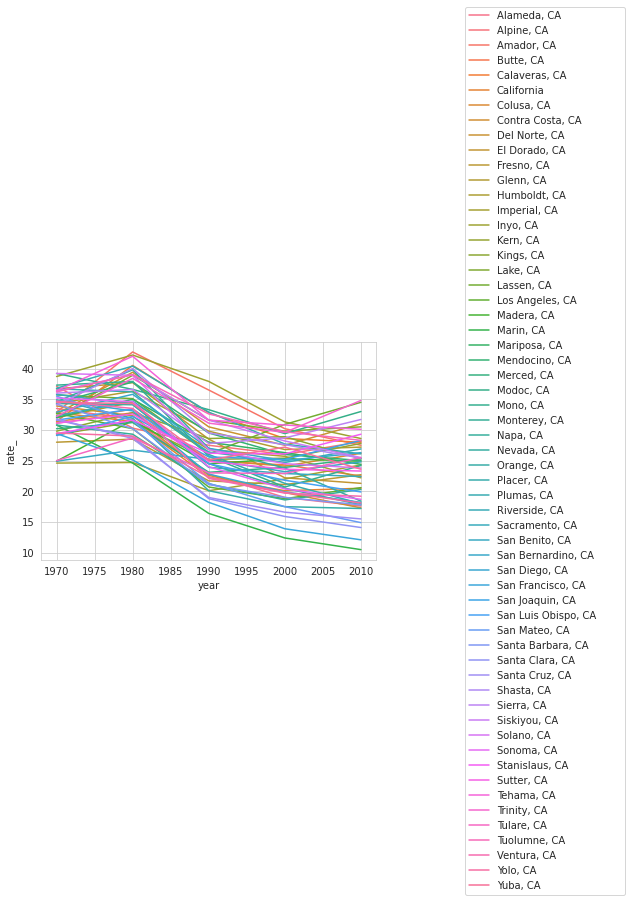

In [ ]:
sns.set_style("whitegrid")
testplot = sns.lineplot(x = 'year', y = 'rate_', hue = 'county', data = highschool_by_county)
testplot.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#There is definitely a lot going on, but some basic trends are still observed in the noise

Third dataset = Electricity used in residential areas by county

In [ ]:
electric_by_county = pd.read_csv('https://raw.githubusercontent.com/trent8800/first-test-ever/main/ElectricityByCounty%20(1).csv')
#This data was downloaded, moved into one of our public repos, and sourced from there. 

electric_by_county.head()
#Using head, we see that there are far more years in this dataset than the previous two, so we will wait to convert this to long format until we decide whether we only want to 
#include the years included in the prior data or if we should just include every year and have empty data

,County,Sector,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,Total Usage
0,ALAMEDA,Residential,3308.467553,3015.393947,2948.368675,2995.051965,2920.921179,2897.493974,2894.253363,2986.226437,2999.683662,3024.848218,3021.677436,3016.750714,2996.423893,2971.909026,3118.292069,3025.275108,2897.838896,2937.121764,2811.630947,2745.213966,2926.117980,2890.767335,2791.331173,2674.834394,2615.308775,2548.457958,2774.566317,2529.229286,2465.000074,2515.209970,2498.265626,88761.931680
1,ALPINE,Residential,10.244564,10.303433,9.593224,10.053618,9.343622,11.904472,12.024085,13.469417,9.336312,9.119062,12.468463,13.045979,8.916435,9.336177,9.543358,8.097052,9.002581,6.358634,6.721079,6.858448,6.247035,6.597345,6.792005,6.373298,6.063832,6.231561,6.183168,6.812776,5.808735,6.165242,6.036978,265.051990
2,AMADOR,Residential,151.826812,138.743791,137.221822,143.779929,135.749855,132.933242,134.842253,139.540785,141.108452,140.263909,139.932189,142.930479,144.125348,142.618754,142.547292,134.400466,135.642939,129.159358,126.437913,121.403726,127.238094,124.602037,123.223191,114.815322,115.017917,110.744724,110.372675,109.035503,105.907059,108.875556,105.093388,4010.134780
3,BUTTE,Residential,736.395940,662.643253,721.603925,764.450593,725.366331,716.200612,721.202572,731.120746,739.696040,726.428245,719.375152,731.880092,724.229757,715.146832,708.603782,685.987792,689.773427,658.692294,638.674159,604.701777,705.766172,629.147565,616.781540,597.449897,594.667475,559.101202,556.276390,551.043168,555.149304,553.073852,547.901570,20588.531456
4,CALAVERAS,Residential,222.260763,202.624931,202.478568,214.931215,198.531876,191.566207,192.873215,199.986790,201.712325,200.693316,198.139885,202.065520,200.737850,199.963155,195.037785,187.922363,189.235410,177.241975,175.351665,168.843439,173.578409,170.901166,167.369797,157.714415,153.829455,148.585115,146.123388,145.291775,140.066797,143.201069,138.299372,5607.159011


In [ ]:
electric_by_county.shape
#We are able to see that there is data listed for 58 counties, just as in the previous datasets, which will make that mapping go smoothly. 
#We also checked each dataset for null values and found none

(58, 34)

Fourth Dataset = Amount of natural gas used by residential sectors each year in each county in California

In [ ]:
gas_by_county = pd.read_csv('https://raw.githubusercontent.com/trent8800/first-test-ever/main/GasByCounty.csv')
#This data was downloaded, moved into one of our public repos, and sourced from there. 

gas_by_county.head()
#Using head, we see that there are far more years in this dataset than the first two, so we will wait to convert this to long format until we decide whether we only want to 
#include the years included in the prior data or if we should just include every year and have empty data

,County,Sector,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,Total Usage
0,ALAMEDA,Residential,216.615141,218.976191,210.826845,214.988935,200.700888,193.386135,191.273571,238.277620,232.297871,245.329593,238.481921,235.773688,239.062003,234.158000,232.049202,228.914041,237.954668,234.607162,239.323177,225.870843,268.786307,300.289750,272.586252,244.883993,244.551780,245.521008,241.235360,263.446670,242.379658,277.623647,271.287576,7381.459496
1,AMADOR,Residential,2.136004,2.165888,2.030004,2.049717,1.921832,1.885700,1.796519,2.174944,2.153382,2.388172,2.223296,2.241431,2.213983,2.205817,2.185952,2.156418,2.241583,2.210048,2.254474,2.127751,2.045476,2.154313,1.997039,1.839774,1.734252,1.741830,1.714945,1.827246,1.628623,1.755432,1.615980,62.817825
2,BUTTE,Residential,21.816990,22.698185,24.989481,27.189926,25.328217,23.904163,24.203910,28.889117,28.607551,30.859910,29.561971,29.093374,29.351332,28.990591,28.729505,28.341348,29.460648,29.046201,29.630080,27.964576,31.437340,33.827864,31.254801,28.681872,28.423685,28.187193,30.122988,30.739004,27.502154,29.048088,28.180464,876.062529
3,CALAVERAS,Residential,0.445337,0.430143,0.371723,0.425254,0.391473,0.436843,0.356240,0.498456,0.464472,0.499225,0.434317,0.479464,0.529740,0.477636,0.473334,0.466939,0.485380,0.478552,0.488172,0.460732,0.522688,0.567245,0.514449,0.461655,0.460462,0.462612,0.514000,0.504996,0.459223,0.452244,0.417324,14.430330
4,COLUSA,Residential,2.128467,2.211679,2.066297,2.147563,2.008418,1.907506,1.877487,2.268122,2.250606,2.448566,2.391259,2.322075,2.309928,2.294921,2.274253,2.243526,2.332131,2.299323,2.345543,2.213700,2.350623,2.573562,2.379988,2.186423,2.188627,2.192911,2.322577,2.369988,2.115309,2.267578,2.206841,69.495797


In [47]:
gas_by_county.shape
#the shape of this data shows us that there are 8 counties not included in this dataset. This lack of a data for the other 8 counties will result in their separate analysis as places that only use electricity'
#the cause of their not using natural ga will determine further analysis, such as decision to no longer use it vs no access.
#We will have to omit the unincluded counties in every other dataset in order to have consistent data exploration. Omitting data is always best avoided, so this will be mad every clear in our project
#if we do have to omit them.

(50, 34)

Overall, the data was very clean and had no missing values. The only thing it needed was some restructuring, and some merging very soon. Since the dataframe was small enough, looking at the entire thing using iloc allowed us to thoroughly examine the columns and determine which were not needed. We also want to try and find proportions of energy used in terms of natural gas and electricity and compare this proportion to each county. The plan is to get the amount of renewable / electric energy used and divide it by the total amount of energy used to get the percentage of each counties energy use that is renewable. 